## OLD EXAM
**Girish Palya**

<div class="alert alert-block alert-warning">
<b>Note:</b> N = 25
</div>

>**TASK 1**

>Taxation is often associated with something, which is destroying the economy. However, taxing goods whose consumption generates external costs can be profitable for the whole economy. You just need to carry out a cost-benefit analysis. The problem is to find the optimal level of taxation. Let's assume that the model of perfectly competitive market is a good approximation of market conditions:


>Consumption of 1 unit of this good generates the external cost EC, which can be approximated by the function  .
a) Calculate the equilibrium condition without regulation, also specify the external costs (EC). (2p)


In [159]:
%matplotlib inline
import sympy as sym
from sympy.plotting import plot

N = 25

p_d, q_d, p_s, q_s = sym.symbols('p_d q_d p_s q_s')

Eq_d = 100*N - 2*p_d - q_d
Eq_s = -90 + 2*p_s - q_s
Eq_eqm_q = q_d - q_s
Eq_eqm_p = p_d - p_s

# Equilibrium
solution_eqm = sym.solve((Eq_d, Eq_s, Eq_eqm_q, Eq_eqm_p), (q_d, q_s, p_d, p_s))
solution_eqm

{q_d: 1205, q_s: 1205, p_d: 1295/2, p_s: 1295/2}

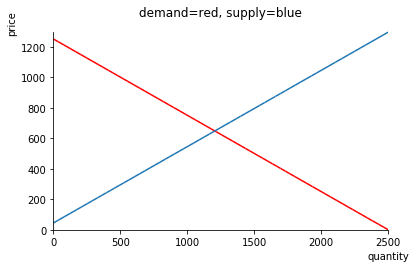

In [180]:
# demand curve
Price_d = sym.solveset(Eq_d, p_d).args[0]
pl = plot(Price_d, (q_d, 0, 2500), xlabel='quantity', ylabel='price', show=False, line_color='red', \
          title='demand=red, supply=blue')
# supply curve
Price_s = sym.solveset(Eq_s, p_s).args[0]
pl.extend(plot(Price_s, (q_s, 0, 2500), show=False))
pl.show()

In [235]:
# External cost
EC = 100*q_d + 0.05*(q_d**2)

print(f'External cost: {EC.subs(q_d, solution_eqm[q_d]):.2f}')

External cost: 193101.25


>b) The government wants to impose ad valorem tax (t) on this good. Specify tax effects on:


In [236]:
t = sym.Symbol('t')

Eq_eqm_tax = p_d - (1+t)*p_s
# new equilibrium
solution_tax_eqm = sym.solve((Eq_d, Eq_s, Eq_eqm_q, Eq_eqm_tax), (q_d, q_s, p_d, p_s))
solution_tax_eqm

{q_d: 10*(241 - 9*t)/(t + 2),
 q_s: 10*(241 - 9*t)/(t + 2),
 p_d: 1295*(t + 1)/(t + 2),
 p_s: 1295/(t + 2)}

>b1) Generated EC external cost. Define the dependence of EC = f(t) - the amount of the external cost as a function of the tax rate t. Draw an approximate graph of this function. (3p)


In [237]:
EC_t = EC.subs(q_d, solution_tax_eqm[q_d])
EC_t

5.0*(241 - 9*t)**2/(t + 2)**2 + 1000*(241 - 9*t)/(t + 2)

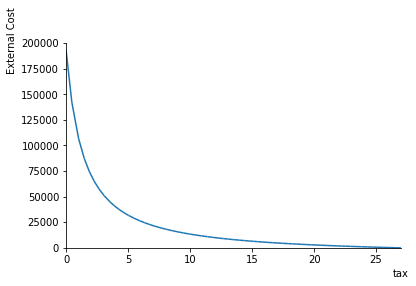

In [238]:
plot(EC_t, (t, 0, 27), xlabel='tax', ylabel='External Cost')

In [239]:
print(f'External cost is zero for tax: {sym.solve(EC_t, t)[1]:.2f}') # unrealistic tax rate

External cost is zero for tax: 26.78


>b2) Tax revenue T. Define the dependence of T = f (t) tax revenue as a function of the tax rate t. Draw an approximate graph of this function. (3p)



In [240]:
# Tax_Revenue = quantity * price_supplier * tax_rate
s = solution_tax_eqm
Tax_Revenue = s[q_d] * s[p_s] * t
Tax_Revenue

12950*t*(241 - 9*t)/(t + 2)**2

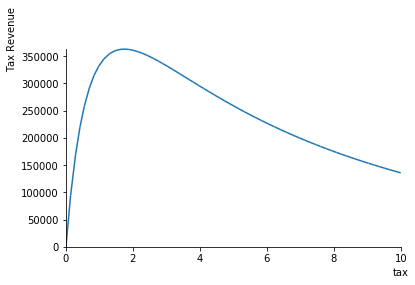

In [241]:
plot(Tax_Revenue, (t, 0, 10), xlabel='tax', ylabel='Tax Revenue')

>b3) Social welfare. Define the dependence SW = f (t) Social Welfare as a function of the tax rate. SW is the sum of tax revenues (T), Producer Surplus (PS), Consumer Surplus (CS) with excluded External Costs (EC) SW = T + CS + PS - EC. Draw an approximate graph of this function. (3p)


In [242]:
# Price (supply and demand) when quantity=0
p_d_0 = sym.solveset(Eq_d, p_d).subs(q_d, 0).args[0]
p_s_0 = sym.solveset(Eq_s, p_s).subs(q_s, 0).args[0]

CS_plus_PS = 1/2 * ((p_d_0 - p_s_0) + t) * solution_tax_eqm[q_d]
# area of trapezoid = 1/2.base.sum_of_parallel_sides
SW = Tax_Revenue + CS_plus_PS - EC_t
SW

12950*t*(241 - 9*t)/(t + 2)**2 - 5.0*(241 - 9*t)**2/(t + 2)**2 + 10*(241 - 9*t)*(0.5*t + 602.5)/(t + 2) - 1000*(241 - 9*t)/(t + 2)

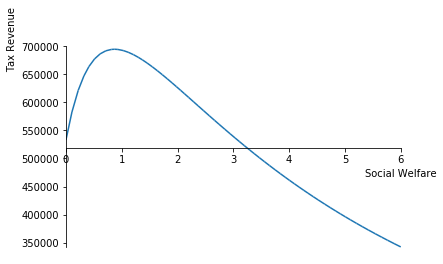

In [243]:
plot(SW, (t, 0, 6), xlabel='Social Welfare', ylabel='Tax Revenue')

>c) Based on point b, find the optimal level of taxation:


>c1) If the government does not take external costs into its accounts and maximizes only tax revenues. (2p)

In [254]:
tax_c1 = sym.solve(sym.diff(Tax_Revenue, t), t)[0]
print(f'Tax (when tax revenue is maximum): {tax_c1.evalf():.2f} ({(tax_c1.evalf()*100):.2f} %)')

Tax (when tax revenue is maximum): 1.74 (174.01 %)


>c2) If the government wants to equalize the tax revenues T with the external EC costs. The tax revenues are intended to eliminate the consequences of the consumption of this good. (2p)

In [257]:
tax_c2 = sym.solve(Tax_Revenue - EC_t, t)
tax_c2

[0.267194664443518, 26.7777777777778]

In [258]:
print(f'Tax (when tax revenue equals external cost): {tax_c2[0]:.4f} ({(tax_c2[0]*100):.2f} %)')

Tax (when tax revenue equals external cost): 0.2672 (26.72 %)


>c3) If the government maximizes social welfare, SW = T + CS + PS - EC. (3p)


In [255]:
tax_c3 = sym.solve(sym.diff(SW, t), t)
tax_c3

[0.869211082412346,
 -3.43460554120617 - 330.307023592796*I,
 -3.43460554120617 + 330.307023592796*I]

In [256]:
print(f'Tax (when social welfare is maximum): {tax_c3[0]:.4f} ({(tax_c3[0]*100):.2f} %)')

Tax (when social welfare is maximum): 0.8692 (86.92 %)


>c4) The government takes over the production of this good as a monopoly. The marginal and average costs of production are the same MC = ATC = 10. Profits of the state monopolistic firm become the revenues of the state budget. Calculate the equilibrium condition without regulation, also specify the external EC costs (4p)


In [249]:
# For a monopolist, the optimum condition is when marginal revenue equals marginal cost. 
#   If marginal revenue < marginal cost, he will reduce output, and vice versa.

Revenue = Price_d * q_d
MR = sym.diff(Revenue, q_d)
MC = 10
q_eqm = sym.solve(MR - MC, q_d)[0]
print(f'At equilibrium, price: {Price_d.subs(q_d, q_eqm)}, output: {q_eqm}')

At equilibrium, price: 630, output: 1240


In [253]:
print(f'external cost: {EC.subs(q_d, q_eqm):.2f}')

external cost: 200880.00


In [265]:
# tax equivalent
# tax = profit / price
p_m = Price_d.subs(q_d, q_eqm)
tax_revenue_m = (p_m - 10) * q_eqm # profit
tax_c4 = tax_revenue_m / (10 * q_eqm)
print(f'Tax (when government produces the goods): {tax_c4} ({tax_c4*100} %)')

Tax (when government produces the goods): 62 (6200 %)


Comment: Government is producing the good at a cost of 10 and selling it at a price of 630!

>d) Analyze the obtained results. Determine the impact of different tax optimization policies applied by the government on this market. (6p)<-- Use the blank page to  answer the question


*Comment: Let's look at the Dead Weight Loss of taxes, and loss of output (productivity)*

**c1: when tax revenue is maximum**

In [287]:
# Let's look at the Dead Weight Loss of taxes, and loss of output (productivity)

# c1: when tax revenue is maximum
# find the prices for demander and supplier
p_d_tax = solution_tax_eqm[p_d].subs(t, tax_c1)
p_s_tax = solution_tax_eqm[p_s].subs(t, tax_c1)
# find output with and without taxes
q_notax = solution_tax_eqm[q_s].subs(t, 0)
q_tax = solution_tax_eqm[q_s].subs(t, tax_c1)
loss_of_output = q_notax - q_tax
print(f'c1: When tax revenue is maximum there is {loss_of_output/q_notax*100} % loss of output (productivity)!')
dead_weight_loss = 1/2 * loss_of_output * (p_d_tax - p_s_tax) 
print(f'c1: When tax revenue is maximum there is {dead_weight_loss:.2f} dead weight loss due to tax!')

c1: When tax revenue is maximum there is 50 % loss of output (productivity)!
c1: When tax revenue is maximum there is 181503.12 dead weight loss due to tax!


**Comment:** This level of taxation cannot be justified. Governemnt will become too rich and corrupt!

**c2: Tax (when tax revenue equals external cost)**

In [299]:
# c2: Tax (when tax revenue equals external cost)
# find the prices for demander and supplier
p_d_tax = solution_tax_eqm[p_d].subs(t, tax_c2[0])
p_s_tax = solution_tax_eqm[p_s].subs(t, tax_c2[0])
# find output with taxes
q_tax = solution_tax_eqm[q_s].subs(t, tax_c2[0])
loss_of_output = q_notax - q_tax
print(f'c1: When tax revenue equals external cost there is {loss_of_output/q_notax*100:.2f} % loss of output (productivity)!')
dead_weight_loss = 1/2 * loss_of_output * (p_d_tax - p_s_tax) 
print(f'c1: When tax revenue equals external cost there is {dead_weight_loss:.2f} dead weight loss due to tax!')

c1: When tax revenue equals external cost there is 12.67 % loss of output (productivity)!
c1: When tax revenue equals external cost there is 11646.29 dead weight loss due to tax!


**Comment:** Is losing 12% productivity justified?! Answer depends on the validity of measuring external cost. Since these types of measurements are wildly inaccurate in practice, the conclusions often depend solely on incentives and political persuation.

**c3: when social welfare is maximum**

In [301]:
#c3: when social welfare is maximum
# find the prices for demander and supplier
p_d_tax = solution_tax_eqm[p_d].subs(t, tax_c3[0])
p_s_tax = solution_tax_eqm[p_s].subs(t, tax_c3[0])
# find output with taxes
q_tax = solution_tax_eqm[q_s].subs(t, tax_c3[0])
loss_of_output = q_notax - q_tax
print(f'c1: When social welfare is maximum there is {loss_of_output/q_notax*100:.2f} % loss of output (productivity)!')
dead_weight_loss = 1/2 * loss_of_output * (p_d_tax - p_s_tax) 
print(f'c1: When social welfare is maximum there is {dead_weight_loss:.2f} dead weight loss due to tax!')

c1: When social welfare is maximum there is 32.56 % loss of output (productivity)!
c1: When social welfare is maximum there is 76954.68 dead weight loss due to tax!


**Comment:** How is reducing productivity by 32% better for society?! Can we just tax so much that people will buy 32% less smart phones (or cars, or refrigerators), and will it be good for society? This is hocus pocus! 

**c4: The government takes over the production of this good as a monopoly.**

**Comment:** This is the most deceptive case. Here there is no dead weight losses! Let's compare.
<table style="width:50%" align="center">
  <tr>
    <th></th>
    <th>Price</th>
    <th>Output</th>
  </tr>
  <tr>
    <td>Free Market</td>
    <td>647.5</td>
    <td>1205</td>
  </tr>
  <tr>
    <td>Government Monopoly</td>
    <td>630</td>
    <td>1240</td>
  </tr>
</table>

According to the table above, government takeover can produce goods at a cheaper price and more people will have the goods (more output)! If so, we should let government make iPhones, cars, and everything else! Fortunately, we have a long history of failed socialist states that teaches us otherwise! The core problem here is that of assuming marginal cost MC as 10. If this is the true cost, and if there is competition from private companies (free enterprise) then this product will not sell for 630, but more like 20 (100% margin). Why are citizens forced to pay \\$630 for a product that takes \\$10 to produce?! If government is charging this kind of margins for this product, what about other products? This pricing is unsustainable. Soon people will run out of money (hint: Venezuela, USSR, Cuba, ...)!

>e) Based on the analysis try to describe the Finnish experiment on humans: 
Finnish government decided to lower the taxes on alcoholat the beginning of the century. The idea was simple - the government tended to increase tax revenue. In the appendix for the task, you have some slides from the report on the Finnish alcohol legislation, which occurred in 2004. Determine whether such a simplified model can be useful for analysing such problems. Skip the discussions of whether parameters are realistic, and focus on whether the behaviour of this model is realistic. Is it possible to use a market solution in this case? Can Coase theorem be applied to this example? (10p)


**Comments**  

I'll analyze this problem in 2 parts: 1) Coase theorem, 2) Viability of market solution

1) **Coase Theorem**  

First, let's identity the property rights, externalities, and the counterparties.   

I assume that a Finnish court would decide the 'property rights' of a drinker as follows: A drinker has the inalienable right to his own body. This means he can put whatever he wants into it, including alcolol! It is his body and he has the right to treat his body any way he wants. Otherwise we have to conclude that a person does not fully own his own body.

Externalities are both financial and social. There is an increase in healthcare costs associated with alcohol related diseases, increase in enforcement (police) costs as alcoholics cause accidents, and so on (financial costs). Social costs are in the form of death of parents if they have young families that need to be supported and so on. Let's ignore the social cost, as it is hard to quantify. We will only condider financial costs, specifically due to alcohol related illnesses. This cost is born by health insurance companies (in a pure free market), or by government provided healthcare, or by a combination of the two. In Finalnd, it could just be the government alone. A court would decide the 'property rights' of government (healthcare department) as follows: Government has the right to limit healthcare costs on behalf of taxpayers. Taxpayer money is the 'propery' of government.

Coase theorem states that, "if trade in an externality is possible and there are no transaction costs, bargaining will lead to an efficient outcome regardless of the initial allocation of property rights.”. So it does not matter how the property rights are defined (as long as they are clearly defined), and we will always get the same level of externality as long as there are no transaction costs to bargaining. Let's see if this is true.

Say, government raises tax on alcohol in order to limit consumption (and use the revenue to fund healthcare). Say there is a private 'alcohol lobby' fighting on behalf of alcohol enthusiasts. Can the two parties negotiate? In this case, it depends on the independence of courts from government. If supreme courts is truly independent, they will strike down the tax-increase law (as unconstitutional) - since such a law unfairly intrudes into the 'property rights' of the alcoholic individual. Then legislators will pass some other law, reducing taxes on alcohol which will make 'alcohol lobby' happy. Unfortunately, there is transaction cost associated with lobbying and government influence on courts (judges can be biased, since they are appointed by politicians). In Finnish case, Coase theorem did not work - because consumption decreased after taxes are increased. This simply means there are non-zero transaction costs. Incidentally, in this case, Becker's theory of rational addiction worked!

Let's see if Coase theorem works in the free market case. Healthcare is provided by private (insurance) companies. Government is not involved. Insurance companies determine payments based on risk assessment. An alcohol consumer with a history of health problems will have to pay more to receive the same coverage as a non-alcoholic person. If they don't, they'll go out of business. This is how market deals with externalities. In this case 'nogotiation' is free of transaction costs. Let's see if an insurance company raises premium on alcoholic person. This person will simply switch to another insurance company (no monopolies, and perfect competition). His price for health insurance does not go up, and it does not affect his consumption. In this case Coase theorem works.

Say, there is no mandate to buy health insurance at all. People who can afford to pay doctors (rich people) will just pay for treatment when they get sick. Their alcohol consumption is not determined by healthcare costs. Poor people who skimp on health insurance, will not be able to go to hospitals if they get sick. However, they do not impose any financial cost (externality) on society either. They'll die out and it was their choice. Coase theorem works in this case.

In summary, transaction costs imposed by government provided healthcare makes Coase theorem fail. In a free market, Coase theorem works as long as courts can clearly define property rights.

2. **Viability of free market solution**
 
Free market works in a beneficial way (ignoring social costs) since health insurance companies impose 'alcohol tax' on their clients who consume alcohol (by increasing the monthly premiums). For those who do not buy insurance, there is no cost for society as they have no right to demand healthcare. By increasing premiums, insurance companies deal with externality associated with illness. This type of indirect tax is more competitive, more transparent, and free of government corruption (what if government redirects alcohol tax for some other partisan purpose?). 

Social cost is hard to assess. In my view, attempts at social engineering leads to worse situations in the long run than not attempting to 'fix' these complex problems. Real world systems are multivariate and complex. They do not follow any distribution. They do not lend themselves to modeling.

PS. I am not an expert on this subject. So I may have missed something.

---

>**TASK 2**
>
>In my opinion, eliminating any type of regulations on drugs market or reduction alcohol taxation was motivated by the domination of neoliberal spirit. Something perceived as purely theoretical solution was implemented as a valid policy. This is the canonic article from that times:    
https://pdfs.semanticscholar.org/ebf3/f79cd5e3795db374d715206b83deee4057db.pdf,    
The article is a fundament of Theory of Rational Addiction. Below, you can find an extraction from article criticizing this theory. “Becker and Murphy (1988) state that ‘‘addictions, even strong ones, are usually rational in the sense of involving forward-looking maximization with stable preferences’’ (675) and that their model implies that addicts ‘‘would be even more unhappy if they were prevented from consuming the addictive goods’’ (691). Orphanides and Zervos (1995) use their model as the basis for a welfare analysis of information, education and public policy (751–754). See also the views on welfare analysis in Becker 1996, 20.”    
https://pdfs.semanticscholar.org/8a42/0ea49956c58b1b40c142c931a2d43a1aa3f6.pdf

>a)Refer these articles to drug crisis in USA or Finnish experiment on humans.(8p)


I discussed this topic in more detail in an earlier post.

In short, Becker's theory worked in Finnish case - consumption went down as alcohol tax was increased! There were less deaths. Some people might have quit drinking also.

>b) How the quiet assumption about ergodicity of the economic processes can affect the validity of the Theory of Rational Addiction. (6p)


If there is ergodicity, then after a long period of time (after raising taxes), consumption will go back to pervious levels. Tax increase will only have temporary effect. We need more long term data to assess this!
<br><br>

<p><small>
ergodic  <br>
adj.	Of or relating to certain systems that, given enough time, will eventually return to previously experienced state. <br> 
adj.	Of or relating to a process in which every sequence or sample of sufficient size is equally representative of the whole.  <br>
adj.	positive recurrent aperiodic state of stochastic systems; tending in probability to a limiting form that is independent of the initial conditions<br>
    </small></p>

---

>**Task3**

>a1) One must choose between going to community college or to university. The annual tuition fees are \\$10.000 and \\$80.000,  respectively. Assume it takes you 3 years to get a degree or qualification. Assume, that people can work 40 years after graduation. After graduation from community college, one is going to have average annual income of \\$30.000. After graduation from university, one is going to have average annual income of \\$90.000. Assuming annual interest rate r =7%, calculate $NPV_{university}$ of going to university and $NPV_{community college}$ of going to community college. What would be the rational decision? (4p)

>During the studies, students of community college work at low-paid position, earning up to N*1000$ = ……. annually. University students focus on learning and do not work.


In [40]:
r = sym.Symbol('r', real=True)
# assume all tuition fees is paid at beginning of year, and all salary is also paid at beginning of year
def npv(salary, tuition):
    npv = 0
    for i in range(3, 43):
        npv += 1/(1+r)**i
    npv = salary * npv
    npv = npv - (tuition * (1 + 1/(1+r) + 1/(1+r)**2)) 
    return npv

npv_community_college = npv(30000, 10000)
npv_university = npv(90000, 80000)

# include the salary from part-time work undertaken by community college students. 
npv_community_college = (N * 1000 * (1 + 1/(1+r) + 1/(1+r)**2)) + npv_community_college

# Net Present Value
print(f'NPV of university: {npv_university.subs(r, .07)}, NPV of community college: {npv_community_college.subs(r, .07)}') 

NPV of university: 823357.320148006, NPV of community college: 391453.197029567


Rational decision is to get university degree (NPV is higher).

>a2) Express NPVcommunity college, NPVuniversity as functions of interest rate. Do graphs in Maxima, Excel, or Python. Based on graphical analysis, can you state that it is always better to go either to community college, either to university? What is the critical value of interest rate? (4p)



In [18]:
npv_university

-80000 - 80000/(r + 1) - 80000/(r + 1)**2 + 90000/(r + 1)**3 + 90000/(r + 1)**4 + 90000/(r + 1)**5 + 90000/(r + 1)**6 + 90000/(r + 1)**7 + 90000/(r + 1)**8 + 90000/(r + 1)**9 + 90000/(r + 1)**10 + 90000/(r + 1)**11 + 90000/(r + 1)**12 + 90000/(r + 1)**13 + 90000/(r + 1)**14 + 90000/(r + 1)**15 + 90000/(r + 1)**16 + 90000/(r + 1)**17 + 90000/(r + 1)**18 + 90000/(r + 1)**19 + 90000/(r + 1)**20 + 90000/(r + 1)**21 + 90000/(r + 1)**22 + 90000/(r + 1)**23 + 90000/(r + 1)**24 + 90000/(r + 1)**25 + 90000/(r + 1)**26 + 90000/(r + 1)**27 + 90000/(r + 1)**28 + 90000/(r + 1)**29 + 90000/(r + 1)**30 + 90000/(r + 1)**31 + 90000/(r + 1)**32 + 90000/(r + 1)**33 + 90000/(r + 1)**34 + 90000/(r + 1)**35 + 90000/(r + 1)**36 + 90000/(r + 1)**37 + 90000/(r + 1)**38 + 90000/(r + 1)**39 + 90000/(r + 1)**40 + 90000/(r + 1)**41 + 90000/(r + 1)**42

In [19]:
npv_community_college

15000 + 15000/(r + 1) + 15000/(r + 1)**2 + 30000/(r + 1)**3 + 30000/(r + 1)**4 + 30000/(r + 1)**5 + 30000/(r + 1)**6 + 30000/(r + 1)**7 + 30000/(r + 1)**8 + 30000/(r + 1)**9 + 30000/(r + 1)**10 + 30000/(r + 1)**11 + 30000/(r + 1)**12 + 30000/(r + 1)**13 + 30000/(r + 1)**14 + 30000/(r + 1)**15 + 30000/(r + 1)**16 + 30000/(r + 1)**17 + 30000/(r + 1)**18 + 30000/(r + 1)**19 + 30000/(r + 1)**20 + 30000/(r + 1)**21 + 30000/(r + 1)**22 + 30000/(r + 1)**23 + 30000/(r + 1)**24 + 30000/(r + 1)**25 + 30000/(r + 1)**26 + 30000/(r + 1)**27 + 30000/(r + 1)**28 + 30000/(r + 1)**29 + 30000/(r + 1)**30 + 30000/(r + 1)**31 + 30000/(r + 1)**32 + 30000/(r + 1)**33 + 30000/(r + 1)**34 + 30000/(r + 1)**35 + 30000/(r + 1)**36 + 30000/(r + 1)**37 + 30000/(r + 1)**38 + 30000/(r + 1)**39 + 30000/(r + 1)**40 + 30000/(r + 1)**41 + 30000/(r + 1)**42

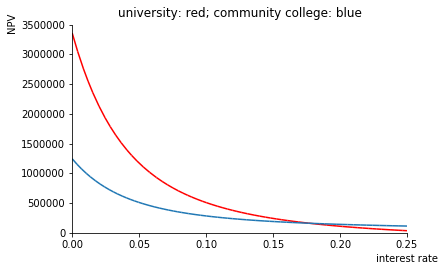

In [20]:
pl = plot(npv_university, (r, 0, 0.25), xlabel='interest rate', ylabel='NPV', show=False, line_color='red', \
          title='university: red; community college: blue')
pl.extend(plot(npv_community_college, (r, 0, 0.25), show=False))
pl.show()

At high enough interest rates community college becomes a more attractive choice. This is because present value of future earnings will be smaller. This is a disadvantage for univeristy since present value of costs of univeristy are higher and present value of future earnings will be lower as interest rate increases.

In [21]:
# Find critical value of r through iteration (solving 42-nd degree polynomial is difficult). 
# Iterate until the sign (of difference) turns negative.
for i in range(500):
    rate = 0.15 + 0.0001 * i
    diff = npv_university.subs(r, rate) - npv_community_college.subs(r, rate)
    if diff < 0: # when sign changes we have a close enough approximation
        print(f'Critial Interest Rate: {(rate * 100):.2f} % (where community college becomes a better choice)')
        break


Critial Interest Rate: 17.71 % (where community college becomes a better choice)


Aside: 
- If we do not consider that community college students work part time, then the critical interest rate would be 22.9% (from above calculation)  
- Even 17.7% real interest rate is unreasonable to expect. During the times where US had high bond yields (>20%) there was also high inflation. Real (long term) interest rates are often in single digits.

>b1) However, not all university graduates are going to have a well-paid job (only the most lucky, ambitious, and hard-working are going to reach the top). Assume that probability of getting a well-paid job in the future is p for university graduates. Assume that all university graduates and community college can get a job with moderately high salary 50.000\\$, if they wish. Describe the NPV of going to university as the function of p. What is the critical value of p, for which it would pay-off to attend the college? (4p)


In [116]:
p = sym.Symbol('p')
npv_univ = p * npv(90000, 80000) + (1-p) * npv(50000, 80000)
npv_univ = npv_univ.subs(r, .07)
npv_univ

465777.232688911*p + 357580.087459095

In [118]:
npv_community_college = npv(50000, 10000)
# include the salary from part-time work undertaken by community college students. 
npv_community_college = (N * 1000 * (1 + 1/(1+r) + 1/(1+r)**2)) + npv_community_college
npv_community_college = npv_community_college.subs(r, .07)
npv_community_college

624341.813374022

In [121]:
p_val = sym.solve(npv_univ - npv_community_college, p)[0]
print(f'Critical value of p: {p_val}')

Critical value of p: 0.572723841341329


>b2) In the previous section, there was an assumption that parents pay for studying, but some students have to take out a loan for their study and their living expenses. Assume that: on average, a college student loan is Lc = 40 000\\$ and university student loan is Lu = 200 000$, and graduates repay the loan for 10 years. How will this conditionaffect the profitability of the university education?  Assume that bank interest rate r = 7%. (8p)


In [123]:
# Calculate annual payments
annual_payment = lambda P : (0.07 * P) / (1 - (1 + 0.07)**(-10)) # assumes they don't have to pay while studying
print(f'Annual payment (Univeristy): {annual_payment(200000)}')
print(f'Annual payment (Commnity college): {annual_payment(40000)}')

Annual payment (Univeristy): 28475.50054547293
Annual payment (Commnity college): 5695.1001090945865


In [127]:
# NPV
# Univeristy fees are 240000, but loan only covered 200000

def pv_salary(salary):
    pv = 0
    for i in range(3, 43):
        pv += 1/(1+r)**i
    return salary * pv

def pv_loan(yearly_payment):
    pv = 0
    for i in range(3, 13):
        pv += 1/(1+r)**i
    return yearly_payment * pv

def pv_tuition(tuition):
     return tuition * (1 + 1/(1+r) + 1/(1+r)**2)
    
# PV of salary from part-time work undertaken by community college students. 
def pv_part_time_work():
    return (N * 1000 * (1 + 1/(1+r) + 1/(1+r)**2))

npv_univ = pv_salary(90000) - pv_loan(annual_payment(200000)) - pv_tuition(40000)
print(f'NPV of university: {npv_univ.subs(r, .07)}')

npv_cc = pv_salary(30000) + pv_part_time_work() - pv_loan(annual_payment(40000))
print(f'NPV of community college: {npv_cc.subs(r, .07)}')

NPV of university: 760990.301194386
NPV of community college: 384595.829573894


In [131]:
# earlier we had 823357.320148006, NPV of community college: 391453.197029567
print(f'Loan reduces NPV of univ by {(823357.32 - 760990.30) * 100 / 823357.32} %')
print(f'Loan reduces NPV of community college by {(391453.19 - 384595.82) * 100 / 391453.19} %')

Loan reduces NPV of univ by 7.574721021487962 %
Loan reduces NPV of community college by 1.7517726704436858 %


>c) Try to create financial simulation of you own financial flows and answer the question whether studying Data Science is profitable.  Present your assumptions and include opportunity cost in your calculations. What is the internal rate of return (IRR) of your investment in Data Science? [IRR it is an interest rate for which NPV = 0].(6p)


TBD

>d) How do you think, is our perception of own talents and qualities biased? In which way? Can this explain the increasing students loans burden? [compare with point a1,  a2, b1, b2] Discuss. Apply the problem to your financial simulation of studying Data Science [point c]. (6p)<-- Use the blank page to  answer the question


Student loan burden is best understood in terms of: 

1. Easy access to student loans without regard to counter-party risk 
2. Raising cost of college 
3. Cultural pressure to get university degree
4. Proliferation of (useless) majors in liberal arts

All of the above factors are linked. In the past, colleges were cheap and very few students took out loans. In fact, only those students who were confident of repaying back the loan, took out the loans. Banks also had high standard of lending. They would only lend money to students who were admitted to a high-paying major (like STEM, law, etc.). This way, market was working as economics would predict. But, something changed in the last 20 years. Congress passed laws that forced banks to relax standards of lending. There was a political push to persuade students to get college degrees, with the mistaken assumption that getting a college degree (however uselss it is) would automatically lead to higher salary. Universities happily obliged by increasing enrollment. For those low performing students who would otherwise not get accepted, they created new liberal arts majors. As more easy money becomes available through student loans, universities increased tuition fees (you can see the steady growth of tuition fees from 2000 - 2019). Universities got rich. They built new shiny campuses, hired more admistrators and increased their endowment - directly benefiting from easy availability of student loans. 

A vast majority of college graduates do not make \\$90000 annually. Many who graduate with liberal arts degrees end up working in menial jobs (almost all Starbucks baristas in US have college degrees). They cannot pay back their loans. Therefore we have a huge burden of unpaied student loan debt as depicted in Figure 1. A proliferation of college graduates also result in employers requiring applicants for jobs (however menial) to be college graduates. It is a cycle that feeds on itself. Ironically, trade school graduates (like plumbers) make significantly more money. Trade schools are also cheaper and do not require 4 years. Jobs are also plentiful. They have job openings they cannot fill, because there are not enough skilled workers of this nature. Market is skewed.

Today, anyone with a college admission can get a student loan. There is no consideration given to whether their degrees are worth anything, and whether they can pay back the loan. There is no collateral needed. If you want to borrow a loan to buy a car or a house, the bank would ask for a collateral. Typically, the new car or house acts as collateral. Bank will repossess the collateral in case of default. When it comes to student loan there is no collateral. These students don't own anything of value. The value of their degreees are not considered in risk assessment (political pressure). The collateral is therefore their own life. Student loan is not forgiven even if a student declares bankrupcy. It is forgiven only when they are dead. There is no escape!

There is nothing wrong with student loan as long as a student can pay it back. STEM (Science, Technology, Engineering, Medicine), Law, and many other majors have a good track record of high employment and salary. Unless a student is in one of these, they should not even think about student loan - it is a trap. Community college (trade school) is a much better option (unless parents are rich!).

PS. These are my opinions only. I don't claim expertise on this subject! In fact, this is the first economics course I have taken in my life.

---

> **Task 4** 

>There are two types of assets in your investment portfolio, which can be defined as a lottery:  
> a)  Define the characteristics of these assets – expected values and standard deviations of returns  . (2 p)


In [39]:
# There are 2 states (state 1 and 2) for these assets, with given probabilities of return.

# asset A
return_A_1 = N/10 # %
probability_A_1 = 1/3
return_A_2 = 10 # %
probability_A_2 = 2/3

# asset B
return_B_1 = 8 # %
probability_B_1 = 1/4
return_B_2 = N/20 # %
probability_B_2 = 3/4

import math

# Average Return = probability weighted mean
avg_return_A = (return_A_1 * probability_A_1) + (return_A_2 * probability_A_2)
variance_A = (probability_A_1 * (return_A_1 - avg_return_A)**2) + (probability_A_2 * (return_A_2 - avg_return_A)**2)
SD_A = math.sqrt(variance_A)

avg_return_B = (return_B_1 * probability_B_1) + (return_B_2 * probability_B_2)
variance_B = (probability_B_1 * (return_B_1 - avg_return_B)**2) + (probability_B_2 * (return_B_2 - avg_return_B)**2)
SD_B = math.sqrt(variance_B)

print(f'A: Expected return: {avg_return_A:.2f}, Std dev = {SD_A:.2f}')
print(f'B: Expected return: {avg_return_B:.2f}, Std dev = {SD_B:.2f}')

A: Expected return: 7.50, Std dev = 3.54
B: Expected return: 2.94, Std dev = 2.92


A is a higher risk asset comapred to B, since standard deviation is higher. Expected return for A is much higher than B. This is to be expected, there has to be additional reward for taking on additional risk.


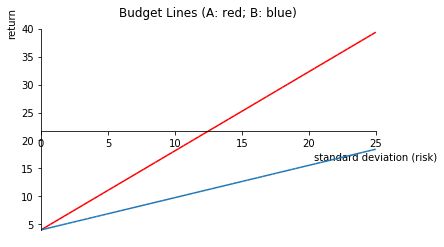

In [84]:
# Plot budget lines to determine preferences b/w risk and return.
# assume risk-free rate is 4%
slope_A = (avg_return_A - (N/10)) / SD_A
s = sym.Symbol('s') # standard dev.
pl = plot(slope_A * s + 4, (s, 0, 25), xlabel='standard deviation (risk)', ylabel='return', show=False, line_color='red', \
          title='Budget Lines (A: red; B: blue)')
slope_B = (avg_return_B - (N/20)) / SD_B
pl.extend(plot(slope_B * s + 4, (s, 0, 25), show=False))
pl.show()

Conclusions:
- If someone has a choice to combine a risk-free asset (say, treasury bills) with one of (either) A or B, then they'd choose A over B. They'd get higher return from A for the same risk.
- If someone was forced to put all their money in either A or B, they'd choose B over A. B offers lower risk possibilities compard to A (B lies on a more favorable indifference curve compared to A).

>In portfolio, there are 30% of asset A () and 70% of asset B (). There is no correlation between the returns of these. 
b) Calculate the expected value of portfolio  and its variance s2. [ Hint :  (3 p)


In [81]:
expected_return = .3 * avg_return_A + .7 * avg_return_B
print(f'expected return of portfolio: {expected_return} %')

expected return of portfolio: 4.3062499999999995 %


In [55]:
variance = (.3 * SD_A)**2 + (.7 * SD_B)**2
print(f'variance: {variance}')

variance: 5.3110546874999995


>c) Based on historical data, you know that transformation between these types of assets can be defined using Markov chains, which is described as:

>Find out how the properties of portfolio change over time (pay attention to the share of the particular asset, expected value, and the variance (standard deviation) of portfolio returns). Analyze these changes (12 p). 

In [86]:
# markov chain as matrix
#    A      B
# A  0.6    0.4 
# B  0.95   0.05
# rows -> initial state, columons -> final state
import numpy as np

markov_m = [[0.6, 0.4],
             [0.95, 0.05]]
markov = np.matrix(markov_m)

A_B_m = [[.3, .7]]  # 30% asset A, 70% of B
A_B = np.matrix(A_B_m)

# After 1 time period
new_A_B = A_B * markov
print(f'After 1 time period, allocation A:B = {new_A_B[0,0]}:{new_A_B[0,1]}')

# Iterate over many time periods
for t in range(1, 10):
    new_A_B = new_A_B * markov
    print(f'After {t+1} time period, allocation A:B = {new_A_B[0,0]}:{new_A_B[0,1]}')

After 1 time period, allocation A:B = 0.845:0.155
After 2 time period, allocation A:B = 0.65425:0.34575
After 3 time period, allocation A:B = 0.7210125:0.2789875
After 4 time period, allocation A:B = 0.6976456249999999:0.30235437499999995
After 5 time period, allocation A:B = 0.7058240312499998:0.29417596875
After 6 time period, allocation A:B = 0.7029615890624998:0.29703841093749994
After 7 time period, allocation A:B = 0.7039634438281248:0.29603655617187496
After 8 time period, allocation A:B = 0.703612794660156:0.2963872053398437
After 9 time period, allocation A:B = 0.7037355218689452:0.2962644781310546
After 10 time period, allocation A:B = 0.7036925673458689:0.2963074326541308


After many time periods (say 10), the allocation converges to A ~ 70% and B ~ 30%!  
This is the reverse of initial allocation.

In [82]:
expected_return = new_A_B[0,0] * avg_return_A + new_A_B[0,1] * avg_return_B
print(f'expected return of portfolio: {expected_return} %')

expected return of portfolio: 6.148097338515526 %


In [83]:
variance = (new_A_B[0,0] * SD_A)**2 + (new_A_B[0,1] * SD_B)**2
print(f'variance: {variance}')

variance: 6.939846745593775


Both risk and return have increased!

>b) Below you can see tables giving rating transition matrixes (one and fife year)  produced from historical data by Standard and Poor’s (S&P). Try to find out any interesting patterns in time. Based on our experience from the last our experiment what do you think about assumption about ergodicity of the Markov chain  model applied to financial markets (7p) 


Let's go back to the previous Markov transition matrix and see what happens to it if we multiply itself many times. This is the new transformation applied from period 1 to 10 directly.


In [92]:
new_m = markov
# Iterate over many time periods
for t in range(11):
    print(f'iteration: {t}')
    print(new_m)
    new_m = new_m * markov

iteration: 0
[[0.6  0.4 ]
 [0.95 0.05]]
iteration: 1
[[0.74   0.26  ]
 [0.6175 0.3825]]
iteration: 2
[[0.691    0.309   ]
 [0.733875 0.266125]]
iteration: 3
[[0.70815    0.29185   ]
 [0.69314375 0.30685625]]
iteration: 4
[[0.7021475  0.2978525 ]
 [0.70739969 0.29260031]]
iteration: 5
[[0.70424838 0.29575163]
 [0.70241011 0.29758989]]
iteration: 6
[[0.70351307 0.29648693]
 [0.70415646 0.29584354]]
iteration: 7
[[0.70377043 0.29622957]
 [0.70354524 0.29645476]]
iteration: 8
[[0.70368035 0.29631965]
 [0.70375917 0.29624083]]
iteration: 9
[[0.70371188 0.29628812]
 [0.70368429 0.29631571]]
iteration: 10
[[0.70370084 0.29629916]
 [0.7037105  0.2962895 ]]


After only 6 periods we see the values converging. This means there is Ergodicity. What we expect after 6 time periods (say) is representative of a larger time scale. Let's see if the same exists for Rating Migration Probabilities.

You can use google docs to extract text from image (https://support.google.com/drive/answer/176692?co=GENIE.Platform%3DDesktop&hl=en)

In [140]:
# 93.66 5.83 0.40 0.08 0.03 0.00 0.00 0.00 
# 0.66 91.72 6.94 0.49 0.06 0.09 0.02 0.01
# 0.07 2.25 91.76 5.19 0.49 0.20 0.01 0.04
# 0.03 0.25 4.83 89.26 4.44 0.81 0.16 0.22
# 0.03 0.07 0.44 6.67 83.31 7.47 1.05 0.98
# 0.00 0.10 0.33 0.46 5.77 84.19 3.87 5.30
# 0.16 0.00 0.31 0.93 2.00 10.74 63.96 21.94
# 0.00 0.00 0.00 0.00 0.00 0.00 0.00 100.00

rmp_m = [[93.66, 5.83, 0.40, 0.08, 0.03, 0.00, 0.00, 0.00],
       [0.66, 91.72, 6.94, 0.49, 0.06, 0.09, 0.02, 0.01],
       [0.07, 2.25, 91.76, 5.19, 0.49, 0.20, 0.01, 0.04],
       [0.03, 0.25, 4.83, 89.26, 4.44, 0.81, 0.16, 0.22],
       [0.03, 0.07, 0.44, 6.67, 83.31, 7.47, 1.05, 0.98],
       [0.00, 0.10, 0.33, 0.46, 5.77, 84.19, 3.87, 5.30],
       [0.16, 0.00, 0.31, 0.93, 2.00, 10.74, 63.96, 21.94],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 100.00]]

rmp = np.matrix(rmp_m)
rmp = rmp / 100

In [141]:
# Let's analyze counterparty risk (risk of default). 

# Say you buy only AAA bonds 
alloc = np.matrix([[100, 0, 0, 0, 0, 0, 0 ,0]]) # 100% in AAA bonds

# Let's see what happens to allocation after 30 years.
new_rmp = rmp
for t in range(31):
    new_rmp = new_rmp * rmp
    print(f'year {t}')
    print(f'{alloc * new_rmp}')
alloc * new_rmp

# Last value of each row printed below is the % of bonds that defaulted

year 0
[[8.7760747e+01 1.0816875e+01 1.1502780e+00 1.9766400e-01 6.2101000e-02
  8.9360000e-03 1.6490000e-03 1.2130000e-03]]
year 1
[[8.22689928e+01 1.50641171e+01 2.16708422e+00 3.63544178e-01
  9.95159232e-02 2.59760876e-02 4.64724930e-03 4.63364790e-03]]
year 2
[[7.71542251e+01 1.86628544e+01 3.38113936e+00 5.83400994e-01
  1.44977723e-01 5.06388039e-02 8.83377497e-03 1.11782857e-02]]
year 3
[[7.23884215e+01 2.16933476e+01 4.73536314e+00 8.59381333e-01
  2.00694043e-01 8.26957881e-02 1.41361967e-02 2.17232776e-02]]
year 4
[[6.79458271e+01 2.42263007e+01 6.18294912e+00 1.19095543e+00
  2.68344824e-01 1.22087384e-01 2.05363418e-02 3.71285565e-02]]
year 5
[[6.38027540e+01 2.63240084e+01 7.68573311e+00 1.57565860e+00
  3.49107642e-01 1.68852638e-01 2.80465304e-02 5.82505522e-02]]
year 6
[[5.99374001e+01 2.80413625e+01 9.21281044e+00 2.00967529e+00
  4.43699869e-01 2.23073483e-01 3.66932169e-02 8.59475486e-02]]
year 7
[[5.63296856e+01 2.94267342e+01 1.07393645e+01 2.48829579e+00
  5.5242

matrix([[15.18561961, 25.95715298, 29.97168297, 15.51204388,  5.12881564,
          3.19058149,  0.51802787,  4.52790686]])

- There is no covergence of this matrix after many years. There is no ergodicity. Risk keeps increasing.
- Only 4.5% of AAA bonds defaulted after 30 years. I am not sure if this is matches reality - given that we had financial meltdown in 2008.

ps. I am not confident about this answer.